In [89]:
!pwd

/Users/tsung-chin.han/ZDOC/Berkeley/w266/project_selfcheck/cls


In [1]:
import pandas as pd
import numpy as np

import json

from matplotlib import pyplot as plt
%matplotlib inline


### load reddit_jokes

In [91]:
df = pd.read_json('reddit_jokes.json')
df.head()

,body,id,score,title
0,"Now I have to say ""Leroy can you please paint ...",5tz52q,1,I hate how you cant even say black paint anymore
1,Pizza doesn't scream when you put it in the ov...,5tz4dd,0,What's the difference between a Jew in Nazi Ge...
2,...and being there really helped me learn abou...,5tz319,0,I recently went to America....
3,A Sunday school teacher is concerned that his ...,5tz2wj,1,"Brian raises his hand and says, “He’s in Heaven.”"
4,He got caught trying to sell the two books to ...,5tz1pc,0,You hear about the University book store worke...


(array([1.93449e+05, 6.59000e+02, 2.42000e+02, 1.13000e+02, 4.90000e+01,
        2.40000e+01, 1.10000e+01, 3.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([    0. ,  4852.6,  9705.2, 14557.8, 19410.4, 24263. , 29115.6,
        33968.2, 38820.8, 43673.4, 48526. ]),
 <a list of 10 Patch objects>)

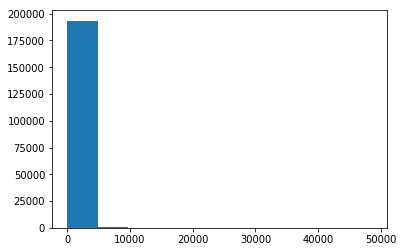

In [92]:
# orignial distributition
plt.hist(df.score)


In [94]:
# modeling score >= 10 | <10
df['score_modeling'] = df.score.apply(lambda x: 1 if x >= 10 else 0)


(array([133075.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  61478.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

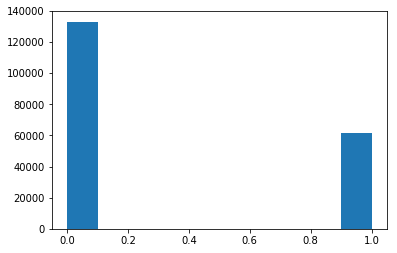

In [95]:
# modeling new binary distribution
plt.hist(df.score_modeling)


In [96]:
# target
df['target'] = 'title:' + df.title + ". " + "body:" + df.body


In [100]:
# finanl modeling dataset
final_modeling = df[['target', 'score_modeling']]
print(final_modeling.shape)
final_modeling


(194553, 2)


,target,score_modeling
0,title:I hate how you cant even say black paint...,0
1,title:What's the difference between a Jew in N...,0
2,title:I recently went to America..... body:......,0
3,"title:Brian raises his hand and says, “He’s in...",0
4,title:You hear about the University book store...,0
5,title:Why is it unknown on how pterodactyls ur...,0
6,title:Why women need legs?. body:To avoid leav...,0
7,title:I walked into a PETA adoption center and...,0
8,title:How did TV studios make words appear on ...,0
9,title:How do you find Will Smith in the snow?....,0


In [102]:
### split train, dev 